In [1]:
import warnings
warnings.filterwarnings('ignore')

# Intel SKlearn 하드웨어 가속 패치 설정
import sys
if sys.platform == 'win32':
    from sklearnex import patch_sklearn
    patch_sklearn()

from helper.util import *
from helper.plot import *
from helper.analysis import *
from helper.classification import *

from sklearn.linear_model import SGDClassifier

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/winequality.xlsx", categories=['type', 'quality'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   type                  6497 non-null   category
 1   fixed acidity         6487 non-null   float64 
 2   volatile acidity      6489 non-null   float64 
 3   citric acid           6494 non-null   float64 
 4   residual sugar        6495 non-null   float64 
 5   chlorides             6495 non-null   float64 
 6   free sulfur dioxide   6497 non-null   float64 
 7   total sulfur dioxide  6497 non-null   float64 
 8   density               6497 non-null   float64 
 9   pH                    6488 non-null   float64 
 10  sulphates             6493 non-null   float64 
 11  alcohol               6497 non-null   float64 
 12  quality               6497 non-null   category
dtypes: category(2), float64(11)
memory usage: 571.6 KB
None

데이터프레임 상위 5개 행
+----+--------+-----------------+---

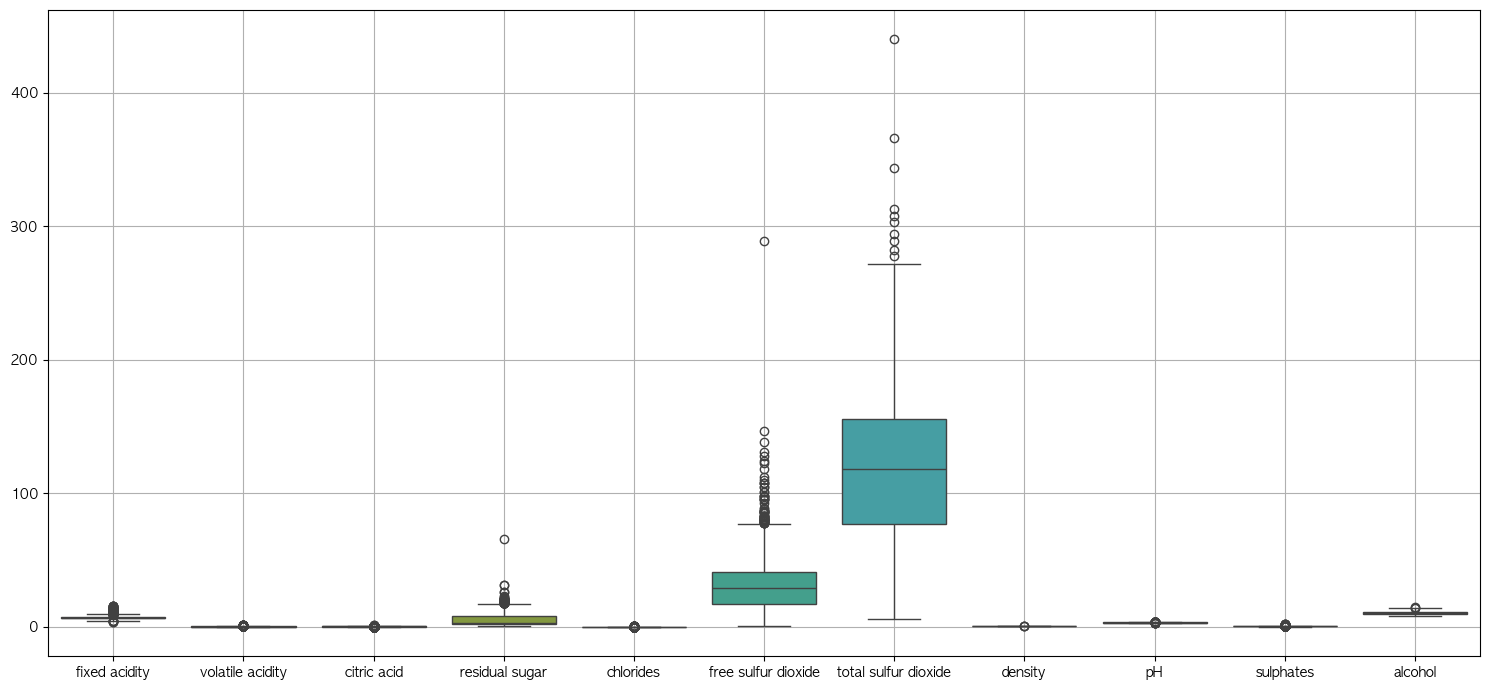

In [3]:
my_boxplot(origin, figsize=(15, 7))

In [4]:
df1 = my_standard_scaler(origin)
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,-0.167030,-0.423303,0.284180,3.206483,-0.315173,0.815565,0.959976,2.102214,-1.358722,-0.545791,-1.418558,white,6
1,-0.706883,-0.241083,0.146489,-0.808012,-0.200996,-0.931107,0.287618,-0.232332,0.507693,-0.276979,-0.831615,white,6
2,0.681310,-0.362563,0.559560,0.305958,-0.172452,-0.029599,-0.331660,0.134525,0.258838,-0.612994,-0.328521,white,6
3,-0.012786,-0.666262,0.008799,0.642251,0.055902,0.928254,1.243074,0.301278,-0.176659,-0.881807,-0.496219,white,6
4,-0.012786,-0.666262,0.008799,0.642251,0.055902,0.928254,1.243074,0.301278,-0.176659,-0.881807,-0.496219,white,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.784004,1.581115,-1.643483,-0.723939,0.969318,0.083090,-1.269422,0.067824,1.440901,0.327849,0.006875,red,5
6493,-1.015370,1.277415,-1.505793,-0.681902,0.170079,0.477500,-1.145567,0.141195,1.876398,NaN,0.593818,red,6
6494,-0.706883,1.034456,-1.299258,-0.660884,0.569698,-0.085943,-1.340197,0.347969,1.254259,1.470302,0.426120,red,6
6495,-1.015370,1.854445,-1.368103,-0.723939,0.541154,0.083090,-1.269422,0.257923,2.187467,1.201490,-0.244672,red,5


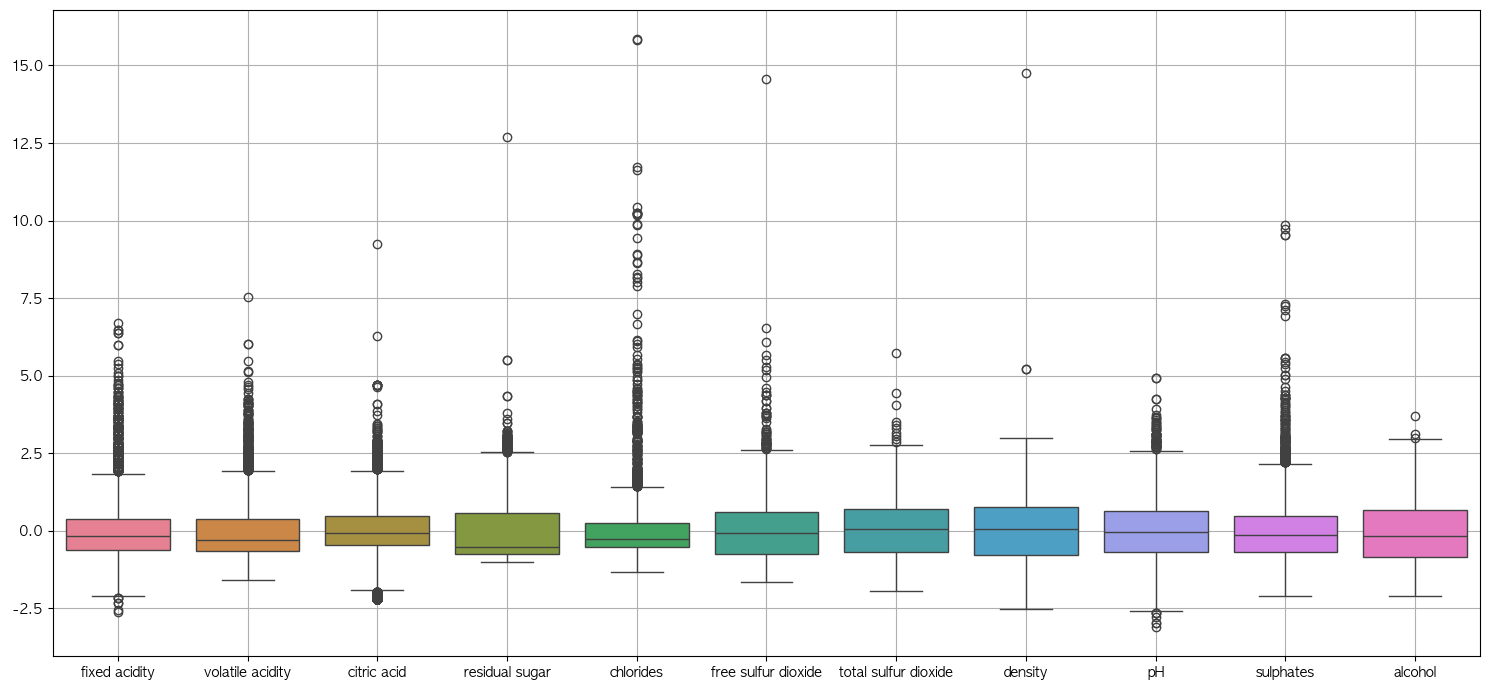

In [5]:
my_boxplot(df1, figsize=(15, 7))

In [6]:
df2 = my_labelling(df1, 'type')
df2['quality'] = df2['quality'].astype('int')
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,-0.167030,-0.423303,0.284180,3.206483,-0.315173,0.815565,0.959976,2.102214,-1.358722,-0.545791,-1.418558,1,6
1,-0.706883,-0.241083,0.146489,-0.808012,-0.200996,-0.931107,0.287618,-0.232332,0.507693,-0.276979,-0.831615,1,6
2,0.681310,-0.362563,0.559560,0.305958,-0.172452,-0.029599,-0.331660,0.134525,0.258838,-0.612994,-0.328521,1,6
3,-0.012786,-0.666262,0.008799,0.642251,0.055902,0.928254,1.243074,0.301278,-0.176659,-0.881807,-0.496219,1,6
4,-0.012786,-0.666262,0.008799,0.642251,0.055902,0.928254,1.243074,0.301278,-0.176659,-0.881807,-0.496219,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.784004,1.581115,-1.643483,-0.723939,0.969318,0.083090,-1.269422,0.067824,1.440901,0.327849,0.006875,0,5
6493,-1.015370,1.277415,-1.505793,-0.681902,0.170079,0.477500,-1.145567,0.141195,1.876398,NaN,0.593818,0,6
6494,-0.706883,1.034456,-1.299258,-0.660884,0.569698,-0.085943,-1.340197,0.347969,1.254259,1.470302,0.426120,0,6
6495,-1.015370,1.854445,-1.368103,-0.723939,0.541154,0.083090,-1.269422,0.257923,2.187467,1.201490,-0.244672,0,5


In [7]:
df3 = df2.dropna()
df3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,-0.167030,-0.423303,0.284180,3.206483,-0.315173,0.815565,0.959976,2.102214,-1.358722,-0.545791,-1.418558,1,6
1,-0.706883,-0.241083,0.146489,-0.808012,-0.200996,-0.931107,0.287618,-0.232332,0.507693,-0.276979,-0.831615,1,6
2,0.681310,-0.362563,0.559560,0.305958,-0.172452,-0.029599,-0.331660,0.134525,0.258838,-0.612994,-0.328521,1,6
3,-0.012786,-0.666262,0.008799,0.642251,0.055902,0.928254,1.243074,0.301278,-0.176659,-0.881807,-0.496219,1,6
4,-0.012786,-0.666262,0.008799,0.642251,0.055902,0.928254,1.243074,0.301278,-0.176659,-0.881807,-0.496219,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,-0.321274,1.702595,-1.643483,-0.744957,0.341344,-0.142287,-1.375584,0.604769,1.254259,1.940724,-0.831615,0,6
6492,-0.784004,1.581115,-1.643483,-0.723939,0.969318,0.083090,-1.269422,0.067824,1.440901,0.327849,0.006875,0,5
6494,-0.706883,1.034456,-1.299258,-0.660884,0.569698,-0.085943,-1.340197,0.347969,1.254259,1.470302,0.426120,0,6
6495,-1.015370,1.854445,-1.368103,-0.723939,0.541154,0.083090,-1.269422,0.257923,2.187467,1.201490,-0.244672,0,5


In [8]:
x_train, x_test, y_train, y_test = my_train_test_split(df3, yname='quality')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5170, 12), (1293, 12), (5170,), (1293,))

In [14]:
%%time
my_classification(x_train, y_train, x_test, y_test)

LogisticRegression의 n_jobs 설정됨
LogisticRegression의 random_state 설정됨
LogisticRegression {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [1000]}
KNeighborsClassifier의 n_jobs 설정됨
KNeighborsClassifier {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
SVC의 random_state 설정됨
SVC {'C': [0.1, 1, 10], 'kernel': ['rbf', 'poly', 'sigmoid'], 'degree': [2, 3, 4, 5]}
GaussianNB {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}
DecisionTreeClassifier의 random_state 설정됨
SGDClassifier의 n_jobs 설정됨
SGDClassifier의 random_state 설정됨
SGDClassifier의 early_stopping 설정됨
SGDClassifier {'loss': ['hinge', 'log', 'modified_huber'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1], 'max_iter': [1000, 2000, 3000, 4000, 5000], 'learning_rate': ['optimal', 'constant', 'invscaling', 'adaptive'], 'eta0': [0.01, 0.1, 0.5]}
DecisionTreeClassifier {'criterion': ['gini', 'entropy'], 'ccp_alpha': array([0.0

{'KNeighborsClassifier': KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=7,
                      weights='distance'),
 'GaussianNB': GaussianNB(var_smoothing=1e-05),
 'LogisticRegression': LogisticRegression(C=0.1, max_iter=1000, n_jobs=-1, random_state=1234),
 'SVC': SVC(C=10, degree=2, random_state=1234),
 'SGDClassifier': SGDClassifier(early_stopping=True, eta0=0.1, learning_rate='adaptive',
               loss='modified_huber', n_jobs=-1, penalty='elasticnet',
               random_state=1234),
 'DecisionTreeClassifier': DecisionTreeClassifier(ccp_alpha=0.00015473887814313343, random_state=1234)}